In [ ]:
import numpy # importa biblioteca para manipulação de matrizes
from matplotlib import pyplot as plt # importa biblioteca para criação de gráficos

# Bibliotecas do keras (Para Deep Learning)
from keras.datasets import fashion_mnist                 # importa o dataset fashion_mnist
from keras.models import Sequential                      # importa um modelo sequencial
from keras.layers import Dense                           # importa camadas totalmente conectadas 
from keras.layers import Dropout                         # importa a estrutura de dropout
from keras.utils import np_utils                         # importa biblioteca de utilidades do keras

# Importanto a Rede pré treinada VGG16 para utilizarmos
from keras.applications.vgg16 import VGG16

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data() # importa o dataset Mnist da biblioteca Keras

# imprime o tamanho do vetor
print(X_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


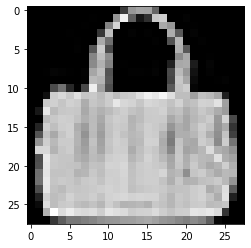

8


In [ ]:
first_image = X_train[4000] # obtém a imagem de treino no índice 4000 do vetor

# realiza manipulação dos dados da imagem
first_image = numpy.array(first_image, dtype ='float')
pixels = first_image.reshape((28,28))

# exibe a imagem do vetor
plt.imshow(pixels, cmap='gray')
plt.show()

# imprime a classe da imagem de treino do índice 4000
print(y_train[4000])

In [ ]:
# Preciso pegar a quantidade de pixels que cada imagem possui pois isso determinará a quantidade de Neurônios de Input que teremos
# Calculando o total de pixels da imagem, multiplicando as dimensões da imagem
num_pixels = X_train.shape[1] * X_train.shape[2]
print(num_pixels)

# Transforma os valores dos pixels para float32
X_train2 = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test2 = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')

# Normalizando os valores dos pixels entre 0 e 1
X_train2 = X_train2 / 255
X_test2 = X_test2 / 255

784


In [ ]:
# Transformando nossos labels (os y) em categóricos para podermos usá-los como uma matriz
# Em outras palavras, estamos transformando o y em ONE HOT VECTOR
y_train_h = np_utils.to_categorical(y_train)
y_test_h = np_utils.to_categorical(y_test)

# Vamos ver um Exemplo: vimos anteriormente que o número no índice 100 é 5, agora veremos ele representado no formato de matriz
print(y_train[4000])
print(y_train_h[4000])

# Vendo qual a categoria do índice 4000 das variáveis teste
print(y_test_h[4000])

8
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
# Trazendo o modelo VGG16
model = VGG16(weights=None, input_shape=(32,32,3))
print(model.summary())

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# Criando a 2ª Rede do Exercício
model2 = Sequential([
    Dense(units=784, kernel_initializer='normal', input_dim=784, activation='relu'), # 1ª camada
    Dense(units=1024, kernel_initializer='normal', activation='relu'), # 2ª camada
    Dense(units=2048, kernel_initializer='normal', activation='relu'), # 3ª camada
    Dense(units=2048, kernel_initializer='normal', activation='relu'), # 4ª camada
    Dense(units=10,kernel_initializer='normal', activation='softmax') # Camada de Saída
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               615440    
                                                                 
 dense_6 (Dense)             (None, 1024)              803840    
                                                                 
 dense_7 (Dense)             (None, 2048)              2099200   
                                                                 
 dense_8 (Dense)             (None, 2048)              4196352   
                                                                 
 dense_9 (Dense)             (None, 10)                20490     
                                                                 
Total params: 7,735,322
Trainable params: 7,735,322
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # compila o modelo criado
result = model2.fit(X_train2, y_train_h, validation_data=(X_test2,y_test_h), epochs=20, verbose=1, batch_size = 100) # executa o treinamento

Epoch 1/20
600/600 [==============================] - 4s 5ms/step - loss: 0.5313 - accuracy: 0.8252 - val_loss: 0.4411 - val_accuracy: 0.8437
Epoch 2/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3643 - accuracy: 0.8671 - val_loss: 0.3830 - val_accuracy: 0.8626
Epoch 3/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3224 - accuracy: 0.8800 - val_loss: 0.3527 - val_accuracy: 0.8719
Epoch 4/20
600/600 [==============================] - 3s 5ms/step - loss: 0.3013 - accuracy: 0.8863 - val_loss: 0.3510 - val_accuracy: 0.8776
Epoch 5/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2853 - accuracy: 0.8927 - val_loss: 0.3699 - val_accuracy: 0.8724
Epoch 6/20
600/600 [==============================] - 3s 6ms/step - loss: 0.2743 - accuracy: 0.8978 - val_loss: 0.3509 - val_accuracy: 0.8765
Epoch 7/20
600/600 [==============================] - 3s 5ms/step - loss: 0.2624 - accuracy: 0.9009 - val_loss: 0.3470 - val_accuracy: 0.8764
Epoch 